## CS545 Assignment 1

**Due date:**  9/7 at 11:59pm
### Prashant K. Thakur

### Preliminaries

We'll start with a little bit of notation... In supervised learning we work with a dataset of $N$ labeled examples: $\mathcal{D} = \{ (\mathbf{x}_i, y_i) \}_{i=1}^N$, where $\mathbf{x}_i$ is a $d$-dimensional vector (we always use boldface to denote vectors), and $y_i$ is the label associated with $\mathbf{x}_i$.  In a binary classification problem we'll usually use the values $\pm 1$ to denote positive/negative examples.


### Part 1:  measuring classifier error

First let's recall that the estimate of a classifier's error is given by:

$$E(h) = \frac{1}{N}\sum_{i=1}^N I(h(\mathbf{x}_i) \neq y_i),$$

where $I(\cdot)$ is the indicator function, and $h$ is the model/hypothesis we are trying to evaluate.

Whenever training a classifier, we like to know how well it's performing.  This is done by computing an estimate of the out of sample error:  pick an independent test set that was not used during training and compute the error of your classifier on this dataset (the test set).  You always want to know that your classifier is learning something, i.e. the error is smaller than what we would expect by chance, i.e. better than a model that simply guesses or picks a fixed answer.  Consider the following classifier, which always classifies an example as belonging to the majority class, i.e. the class to which the largest number of training examples belong to.  

Answer the following:

  * Suppose you have data that is very imbalanced, and let's say for concreteness that we're working with a binary classification problem where the number of negative examples is much larger than the number of positive examples.  What can you say about the estimated error of the majority classifier?  What issue does that raise about evaluating classifiers using this measure?  

**Answer:** If we use imbalanced dataset for training the binary classification problem, our model would be biased towards most common class (which is negative examples).When we use higher numbers of negative examples compared to the positive ones, we might get better accuracy as most of the negative examples but the accuracy might not hold in test case. Most of the machine learning algorithms operates on majority dataset by minimizing the error function without considering the distribution of the dataset and it is highly likely the training would be not able to solve most of the classification problems. Even some algorithm may consider the minority elements of the data as noise and discard them to loose which makes the situation much worse.

To solve this issue, it has been suggested to assign different costs to different types of errors using a cost matrix $c(y_i, h(\mathbf{x}_i))$, where $y_i$ is the actual class of example $i$, and $h(\mathbf{x}_i)$ is the the predicted class.  For a binary classification problem this is a $2 x 2$ matrix, and we'll assume there is no cost associated with a correct classification, which leaves two components to be determined:

  * $c_r = c(+1, -1)$, which is the reject cost (the cost of a false negative)
  * $c_a = c(-1, +1)$, which is the accept cost (the cost of a false positive).

Incorporating the cost matrix into computing classifier error.
  
The regular error 
$$E(h) = \frac{1}{N}\sum_{i=1}^N I(h(\mathbf{x}_i) \neq y_i)$$
is now replaced with:
$$E_{cost}(h) = \frac{1}{N}\sum_{i=1}^N c(y_i, h(\mathbf{x}_i)) \cdot I(h(\mathbf{x}_i) \neq y_i)$$

With these definitions, answer the following:

   * How should we choose $c_r$ and $c_a$ such that the majority classifier and the minority classifier both have an error of 0.5?  (The minority classifier is analogous to the majority classifier, except that it classifies everything as positive, since we assumed the positive class has fewer representatives).  Section 1.4.1 in the book has a brief discussion of error measures.

**Answer**: Since the data is imbalanced, we want to compensate for the minority elements so that the learning process gets penalized heavily if it makes a mistake by classifying positive example (minority in our case) to negative examples (majority of the elements in the dataset). Let's borrow an example from our text book: during designing the system the penalty to compensate for false positive and false negative can be completely different. If it is to access the CIA safe house then we can't allow false positive in our fingerprint detector system while allowing some false positive to qualify for discount at some shopping malls might not be severe.Similarly, for medical data (say cancer prediction), if we miss the positive case just because there was no large positive samples in the dataset would cost a patient his/her life because of delayed treatments. Therefore, we need to consider this misclassification cost. So we have to penalize the system differently based on the application of the system. Therefore we have to introduce the cost matrix  $\sum_{i=1}^N c(y_i, h(\mathbf{x}_i))$ into our loss/error function. 

Now we have to select appropriate value for this function so that the error is penalized or increased if the choice made by the model is incorrect. Since the objective is to minimize the loss/error, the model would than try to pick an option which is less costly. Depending on the implementation the cost parameter can be initialized. 

|  |actual (+)|actual (-)|
|------|------|------|
|predicted (+)|0|1|
|predicted (-)|1000|0|

As presented in the table, if the prediction is accurate we don't penalize. However, if there is false positive (predicted negative to positive) we penalize the process highly by 1000 so that next time it doesn't take that path.

|  |actual (+)|actual (-)|
|------|------|------|
|predicted (+)|0|$c_a$|
|predicted (-)|$c_r$|0|

If we have to maintain the error of 0.5 for our majority classifier and minority classifier, we have to select $c_r$ and $c_a$ so that the classifier is penalized such that it would start to predict either of the classes with equal probablity. 

Lets consider out of N is the total number of data in dataset. $n$ be the small number of data (minority element) in the data and $N-n$ be the number of elements of majority group. Now from the cost formula by substituting for majority classifier: 
$$E_{cost}(h) = \frac{1}{N}\sum_{i=1}^N c(y_i, h(\mathbf{x}_i)) \cdot I(h(\mathbf{x}_i) \neq y_i)$$

$$==> 0.5 =  \frac{1}{N}\sum_{i=1}^{N} c_a$$

$$==> 0.5 = \frac{c_a.(N-n)}{N}$$


Similarly for Minority classifier:
$$E_{cost}(h) = \frac{1}{N}\sum_{i=1}^N c(y_i, h(\mathbf{x}_i)) \cdot I(h(\mathbf{x}_i) \neq y_i)$$

$$==> 0.5 =  \frac{1}{N}\sum_{i=1}^{N} c_r$$

$$==> 0.5 = \frac{c_r.(n)}{N}$$


Since they have same error we can equate them:

$$\frac{c_r.(n)}{N} = \frac{c_a.(N-n)}{N}$$

$$==> \frac{c_r}{c_a} = \frac{N-n}{n}$$

Therefore, if we have an imbalanced data we have to multiply the number of minority element by the factor of $\frac{N-n}{n}$ so that the classifier can use both the dataset with same priority. When the classifier predicts true $I(h(\mathbf{x}_i) \neq y_i)$ would be 1 else it would be 0 so we would get the sum as total number of elements * cost for classifier. 

### Part 2:  The nearest centroid classifier

The [closest centroid classifier](https://en.wikipedia.org/wiki/Nearest_centroid_classifier) classifies a data point $\mathbf{x}$ according to the class of the nearest centroid.  More formally, let $C_k$ be the set of examples that belong to class $k$, and let 
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} \mathbf{x}_i,$$ 
where $|C_k|$ is the cardinality of the set $C_k$.  The closest centroid classifier predicts the class of a point $\mathbf{x}$ as:


$$h(\mathbf{x}) = \textrm{argmin}_k ||\mathbf{x} - \mu_k||,$$ 
where $||\mathbf{x}||$ is the [Euclidean norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm) of $\mathbf{x}$.  

Show that for a binary classification problem where the number of positive examples equals the number of negative examples the nearest centroid classifier can be expressed as a linear classifier with the weight vector 
$$\mathbf{w} = \frac{1}{N}\sum_{i=1}^N y_i \mathbf{x}_i.$$
Hint:  consider the vector that connects the centroids of the two classes and draw a figure in two dimensions to help you think about the problem.  Also note that this form only holds if the two classes have equal number of examples, so we'll assume that is the case.


**Answer: ** Lets suppose we have a class $k_+$ and $k_-$ whose centroids are $\mu_{k_+}$ and $\mu_{k_-}$. Now when we see new data we compute the distance of that point from two centroids (of two class $-1$ or $+1$) and assign the point into that class which is done by $h(x)$ function. When we connect the two centroid, we get a straigt line (assumed for easy visualization). The decision boundary can be defined as $wx = y$ where w is a vector perpendicular to the decision boundary and x is some point on the decision boundary so we can say $w = \mu_{k_+} - \mu_{k_-}$. So we have $w$ and we can find the bias term to get the decision boundary as $y = wx +b$. If we select a mid-point of the two centroids, we get:

$$w.\frac{\mu_{k_+} +\mu_{k_-}}{2} +b = 0 $$
Substituting w we get:
$$ b = -\frac{(\mu_{k_+} +\mu_{k_-})(\mu_{k_+} - \mu_{k_-})}{2}$$
$$ b = \frac {- \left(\Vert{\mu_{k_-}}\Vert^2 -\Vert{\mu_{k_+}}\Vert^2\right )}{2}$$

Hence, we can use this bias and the weight function to get the decision boundary. We can now use $\large{sign}\left( \large{WX} - \frac {\Vert{\mu_{k_-}}\Vert^2 -\Vert{\mu_{k_+}}\Vert^2}{2}\right)$ function to classify elements to $\mu_{k_+}$ if we get positive value from the function and $\mu_{k_-}$ if we get negative value from the sign function.

### Part 3:  Are my features/variables/attributes useful?

In order to obtain an accurate classifier you need good features.  But what does that mean?  In this task we will explore that, and how to visually inspect a dataset to identify useful features.

First we need some data... the UCI machine learning repository contains a large selection of datasets that we can experiment with.  In this exercise we'll focus on the
[Heart disease diagnosis dataset](http://archive.ics.uci.edu/ml/datasets/Heart+Disease).
This dataset has several data files associated with it.  The easiest would be to use [this file](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data), where categorical variables have been replaced with numerical vaues.  The last column in the file contains the label associated with each example.  In the processed file, a label `0` corresponds to a healthy individual; other values correspond to varying levels of heart disease.  In your experiments focus on the binary classification problem of trying to distinguish between healthy and non-healthy individuals.  The repository also contains [this file](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod) which has the data with categorical rather than numerical variabels.

Most data will come as a data matrix in csv or related formats.
Each row in the file corresponds to a training example.  
Note that this dataset contains both numerical variables and categorical variables, and you will be asked treat those differently.

The difference between categorical and numerical variables:  

**Categorical variables** are variables whose values fall into discrete categories.  For example:

  * Gender ("male", "female")
  * Degree program of a student ("computer science", "math", "statistics", ...).
  
**Numerical variables** are variables that have values that are numerical, e.g. age, grayscale level in an image, blood pressure, etc.  Note that numerical variables can either be **discrete** or **continuous**.  Age, when measured in years would be considered a discrete value, whereas if you were to measure age in seconds, and allowing for fractions, that would be considered a continuous value.

To read a data matrix you can use numpy's [genfromtxt](http://docs.scipy.org/doc/numpy/user/basics.io.genfromtxt.html) function.
For example, to read the heart dataset you can use the following command:

```python
>>> import numpy as np
>>> data=np.genfromtxt("processed.cleveland.data", delimiter=",")
```

And note that since the file contains both the labels and data points, they need to be separated out.  
As an alternative you can use the ''usecols'' option of ''genfromtxt'' to directly read the columns you are interested in.



Your task is to visualize the usefulness of the features that make up the dataset.
We will use a different way of visualizing categorical and numerical features.
For a numerical feature, generate two histograms of its values:  one for the positive examples, and one for the negative examples.  Use matplotlib's [hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) function to generate the histogram and use the ''normed=True'' option to generated a histogram normalized to be a distribution.
Another option is to use a [boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html).
For categorical variables, [barplots](https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html) are a good choice.

* What does this kind of visualization tell us about the usefulness of a feature for classifying a dataset?  Demonstrate this idea using a dataset from the UCI repository:  plot histograms for four features, two of which you think are going to be useful, and two that have a more limited usefulness in your opinion -- Explain!!
In plotting, create a single plot composed of four [subplots](http://matplotlib.org/examples/pylab_examples/subplots_demo.html), one for each feature.  This is a convenient way of grouping together related plots.
When choosing which features to display, simply use your judgement as to which ones to show.
Would you consider the variable `ca` a categorical variable?

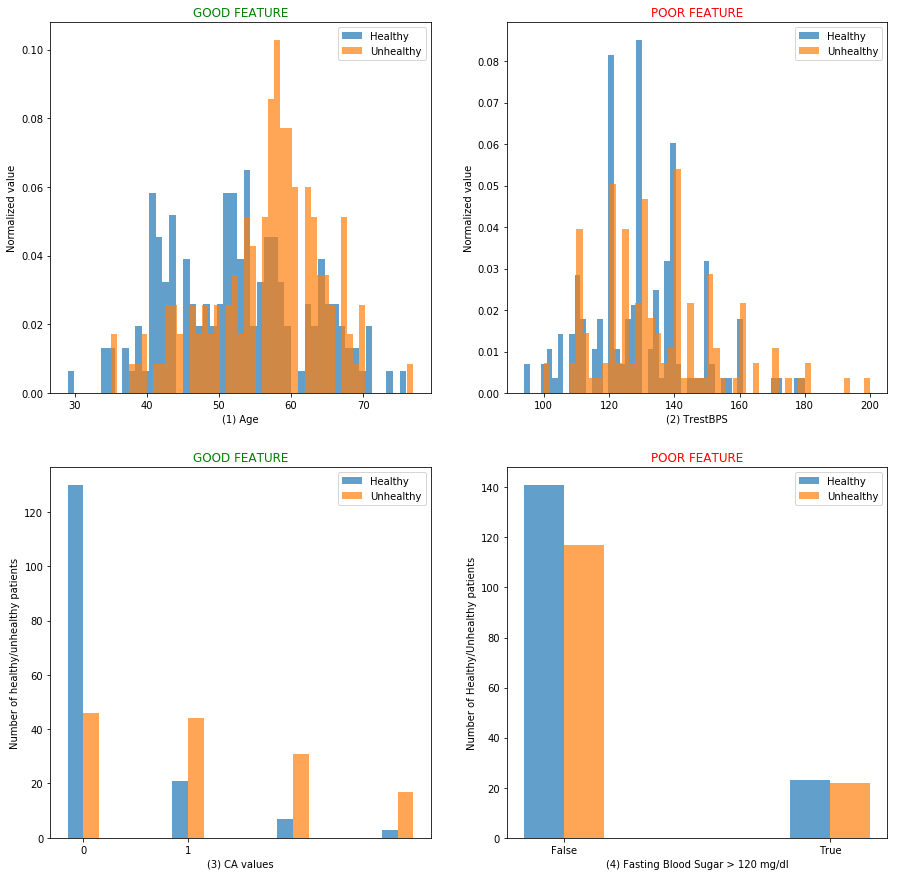

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import data
data = np.genfromtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',delimiter=',')
# header = [ "age", "sex", "cp", "trestbps", "chol","fbs", "restecg","thalach","exang", "oldpeak","slope", "ca", "thal", "num"]

# Plot different parameters based on healthy and unhealthy dataset.
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax0,ax1,ax2,ax3 = axes.flatten()
count = 0

# for i in [ (0,ax0,"Age"), (3,ax1,"TrestBPS"), (4,ax2,"Chol") , (7,ax3,"Thalach")]:
for i in [ (0,ax0,"Age"), (3,ax1,"TrestBPS")]:
    count += 1
    col = data[:,i[0]]
    healthy = col[data[:,-1] == 0]
    unhealthy = col[data[:,-1] != 0]
    i[1].hist(healthy,density=True,bins=50,label="Healthy",alpha=0.7)
    i[1].hist(unhealthy,density=True,bins=50,label="Unhealthy",alpha=0.7)
    i[1].set_ylabel("Normalized value")
    i[1].set_xlabel("(%s) %s"%(count,i[2]))
    if i[2] == "Age":
        i[1].set_title("GOOD FEATURE",color="green")
    else:
        i[1].set_title("POOR FEATURE",color="red")
    i[1].legend() 

# Plot another discrete dataset
index = np.arange(2)
bar_width = 0.15

# CA: 
col = data[:,11]
cols = []
for i in col:
    if np.isnan(i):
        cols.append(0.0)
    else:
        cols.append(i)
cols=np.array(cols)
idx = np.arange(4)
healthy = col[data[:,-1] == 0]
unhealthy = col[data[:,-1] != 0]
healthy_0 = healthy[healthy[:] == 0]
healthy_1 = healthy[healthy[:] == 1]
healthy_2 = healthy[healthy[:] == 2]
healthy_3 = healthy[healthy[:] == 3]
unhealthy_0 = unhealthy[unhealthy[:] == 0]
unhealthy_1 = unhealthy[unhealthy[:] == 1]
unhealthy_2 = unhealthy[unhealthy[:] == 2]
unhealthy_3 = unhealthy[unhealthy[:] == 3]
ax2.bar(idx,[len(healthy_0),len(healthy_1),len(healthy_2),len(healthy_3)],width=bar_width,alpha=0.7,label='Healthy')
ax2.bar(idx+bar_width,[len(unhealthy_0),len(unhealthy_1),len(unhealthy_2),len(unhealthy_3)],width=bar_width,alpha=0.7,label="Unhealthy")
ax2.set_ylabel("Number of healthy/unhealthy patients")
ax2.set_xticks(index + bar_width/2)
ax2.set_xticklabels(('0','1','2','3'))
ax2.set_xlabel("(3) CA values")
ax2.set_title("GOOD FEATURE",color="green")
ax2.legend();

# # Data for sex: 1- male, 0- female
# col = data[:8]
# healthy = col[data[:,-1] == 0]
# unhealthy = col[data[:,-1] != 0]
# healthy_0 = healthy[healthy[:] == 0]
# healthy_1 = healthy[healthy[:] != 0]
# unhealthy_0 = unhealthy[unhealthy[:] == 0]
# unhealthy_1 = unhealthy[unhealthy[:] != 0]

# ax2.bar(index,[len(healthy_0),len(healthy_1)],width=bar_width,alpha=0.7,label='Healthy')
# ax2.bar(index+bar_width,[len(unhealthy_0),len(unhealthy_1)],width=bar_width,alpha=0.7,label="Unhealthy")
# ax2.set_ylabel("Number of Healthy/Unhealthy patients")
# ax2.set_xticks(index + bar_width / 2)
# ax2.set_xticklabels(('Female','Male'))    
# ax2.set_xlabel("Sex")
# ax2.set_title("Good FEATURE",color="green")
# ax2.legend()

# 
col = data[:,5]
healthy = col[data[:,-1] == 0]
unhealthy = col[data[:,-1] != 0]
healthy_0 = healthy[healthy[:] == 0]
healthy_1 = healthy[healthy[:] != 0]
unhealthy_0 = unhealthy[unhealthy[:] == 0]
unhealthy_1 = unhealthy[unhealthy[:] != 0]

ax3.bar(index,[len(healthy_0),len(healthy_1)],width=bar_width,alpha=0.7,label='Healthy')
ax3.bar(index+bar_width,[len(unhealthy_0),len(unhealthy_1)],width=bar_width,alpha=0.7,label="Unhealthy")
ax3.set_ylabel("Number of Healthy/Unhealthy patients")
ax3.set_xticks(index + bar_width / 2)
ax3.set_xticklabels(('False','True'))    
ax3.set_xlabel("(4) Fasting Blood Sugar > 120 mg/dl")
ax3.set_title("POOR FEATURE",color="red")
ax3.legend();


#### ** Good Features (Picture titled as "GOOD FEATURE")**:

In order to consider the feature, different columns of the data were plotted and the data was analyzed to see if the healthy and unhealthy dataset are distinctive. Out of all the four feature that I think would be important (plotted above) are **Age** (figure 1), **CA** (figure 3) ( number of major vessels (0-3) colored by flourosopy). Others good features: **Thalach** (maximum heart rate achieved), **Gender** (Male or Female).

* If we look at the continuous value of **age**, we can see the normalized distribution of the data for healthy and unhealthy are distinctive. The data is distributed with different mean (though they are not spreaded very different). Since this gives us the distinct behavior in classifying the data into two classes, it can be considered as an important feature. Similarly, for the categorical features we see the chances of getting a heart disease is highly likely to be in male than female. This can be one important consideration we need to make from the data and the machine learning algorithm can make good estimates on this feature with some other features.

* Moreover, the next feature that might be important is flourosocpy (**CA**). For unhealthy patients, the flouroscopy results has higher values (1,2,3) than 0 (which is higher in healthy patients. This can be considered as an important feature as this gives a better coorelation with the condition of the heart. Additionally, if we use the knowledge from medical science we can further narrow down what might be used as the feature. Age might be one factor as the strength of muscle decreases as the age increase. Also the heart rate might fluctuate for healthy and unhealthy as unhealthy max heart rate achieved decreases.

Note: **So we can use combination of these features to get better results.**

#### **Bad Features (Picture titled as "POOR FEATURE")**:

* **TrestBPS (resting blood pressure in mm Hg on admission to the hospital)** (figure 2)  the data are distributed very close to each other. So healthy and unhealthy patients might not be distinguished using this feature properly. If we see it using medical science prospective, we can say the resting blood pressure should be normal for most of the cases as the heart was not stressed during resting. So the data might not be reliable to distinguish the classification.

* **Fasting Blood Sugar** (figure 4) doesn't seem to have any difference for healthy and unhealthy patients. The negative test (no higher blood sugar) doesn't give any information if the patient has heart problem or not. Likewise having higher blood sugar does not give any distinct information as the number of healthy and unhealthy patients are similar. Therefore, we can ignore this feature as this doesn't provide any additional feature that can be used for classification.



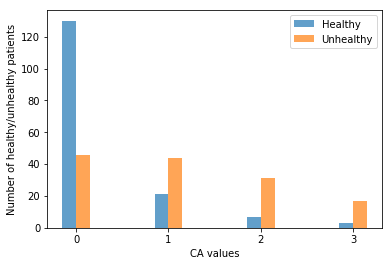

In [256]:
# CA: 
col = data[:,11]
cols = []
for i in col:
    if np.isnan(i):
        cols.append(0.0)
    else:
        cols.append(i)
cols=np.array(cols)
index = np.arange(4)
healthy = col[data[:,-1] == 0]
unhealthy = col[data[:,-1] != 0]
healthy_0 = healthy[healthy[:] == 0]
healthy_1 = healthy[healthy[:] == 1]
healthy_2 = healthy[healthy[:] == 2]
healthy_3 = healthy[healthy[:] == 3]
unhealthy_0 = unhealthy[unhealthy[:] == 0]
unhealthy_1 = unhealthy[unhealthy[:] == 1]
unhealthy_2 = unhealthy[unhealthy[:] == 2]
unhealthy_3 = unhealthy[unhealthy[:] == 3]
plt.bar(index,[len(healthy_0),len(healthy_1),len(healthy_2),len(healthy_3)],width=bar_width,alpha=0.7,label='Healthy')
plt.bar(index+bar_width,[len(unhealthy_0),len(unhealthy_1),len(unhealthy_2),len(unhealthy_3)],width=bar_width,alpha=0.7,label="Unhealthy")
plt.ylabel("Number of healthy/unhealthy patients")
plt.xticks(index + bar_width/2,('0','1','2','3'))
plt.xlabel("CA values")
plt.legend();


**CA** can be considered as categorical variable because this variable can only take one of 4 defined level. When we plot the bar graph, we see the image above the values are marked under category as either healthy or unhealthy. If we consider age of the patients (as one of the feature) in the dataset, we can see it can take many values which are not that discretely defined. In CA we can see the values are divided among all patient to either 0, 1, 2, or 3 which has an ordering though the difference between those value might not be very consistent (like difference between levels 0 and 1 might not be same as difference between levels 2 and 3).

### Your Report

Answer the questions in the cells reserved for that purpose.

Mathematical equations should be written as LaTex equations; the assignment contains multiple examples of both inline formulas (such as the one exemplifying the notation for the norm of a vector $||\mathbf{x}||$ and those that appear on separate lines, e.g.:

$$
||\mathbf{x}|| = \sqrt{\mathbf{x}^T \mathbf{x}}.
$$

### Submission

Submit your report as a Jupyter notebook via Canvas.  Python code can be displayed in your report if it is short, and helps understand what you have done.  Running the notebook should generate all the plots in your notebook.  If your code is very long, you can submit an additional file called `assignment1.py` that gets imported from your notebook.


### Grading 

Here is what the grade sheet will look like for this assignment.  A few general guidelines for this and future assignments in the course:

  * Your answers should be concise and to the point.  We will take off points if that is not the case.
  * Always provide a description of the method you used to produce a given result in sufficient detail such that the reader can reproduce your results on the basis of the description.  You can use a few lines of python code or pseudo-code.

```
Grading sheet for assignment 1

Part 1:  30 points.

Part 2:  35 points.

Part 3:  35 points.
(20 points):  Histograms of informative/non-informative features.
(15 points):  Discussion of the plots.
```

Grading will be based on the following criteria:

  * Correctness of answers to math problems
  * Math is formatted as LaTex equations
  * Correct behavior of the required code
  * Easy to understand plots 
  * Overall readability and organization of the notebook
  * Effort in making interesting observations where requested.
  * Please make your notebooks as concise as possible.
  